Importamos las biblioteca dipy

In [ ]:
!pip install dipy

import dipy
import numpy as np
from dipy.io.streamline import load_tck
from dipy.tracking.streamline import select_random_set_of_streamlines
from dipy.tracking.streamline import set_number_of_points
from dipy.tracking.utils import length
import matplotlib.pyplot as plt
from dipy.io.stateful_tractogram import Space, StatefulTractogram
from dipy.io.streamline import load_tractogram, save_tractogram, save_tck


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.7/83.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 1.4 MB/s eta 0:00:00


Montamos google drive

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

# Ruta base para acceder a los archivos del drive
base_path='/content/drive/MyDrive'


Mounted at /content/drive


Cargamos el archivo de tractografia

In [ ]:
filetracts = base_path + '/Cursos/2024/Curso AID/Clases AID 2024/Data/tractography/all_tracks.tck'
filereference=base_path + '/Cursos/2024/Curso AID/Clases AID 2024/Data/tractography/ISMRM_2023_b3000_FA.nii'

# Cargar el archivo .tck
all = load_tck(filetracts, filereference)

print(all)
all.voxel_sizes

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Cursos/2024/Curso AID/Clases AID 2024/Data/tractography/all_tracks.tck'

Imprimimos los valores de un streamline

In [ ]:

print(len(all.streamlines[0]))
print(all.streamlines[0])

141
[[-107.043236  -111.856476   132.29305  ]
 [-107.06514   -111.99927    131.75732  ]
 [-107.11583   -112.31267    130.5823   ]
 [-107.17277   -112.62428    129.41602  ]
 [-107.227615  -112.88629    128.45905  ]
 [-107.28911   -113.148285   127.50247  ]
 [-107.36133   -113.394745   126.54297  ]
 [-107.44865   -113.62201    125.57976  ]
 [-107.54615   -113.83412    124.61372  ]
 [-107.64459   -114.02896    123.64449  ]
 [-107.73774   -114.22261    122.67185  ]
 [-107.833015  -114.39598    121.69607  ]
 [-107.94137   -114.50226    120.71746  ]
 [-108.05799   -114.52864    119.730316 ]
 [-108.18884   -114.491394   118.741776 ]
 [-108.35434   -114.3963     117.76796  ]
 [-108.568756  -114.2305     116.81459  ]
 [-108.81244   -114.01112    115.87355  ]
 [-109.05674   -113.776474   114.9375   ]
 [-109.29498   -113.52905    114.00531  ]
 [-109.53786   -113.26344    113.0789   ]
 [-109.79123   -112.989      112.15824  ]
 [-110.06047   -112.699585   111.246826 ]
 [-110.33745   -112.40332    1

In [ ]:

print(all.streamlines[0][0,0], all.streamlines[0][0,1], all.streamlines[0][0,2])

#print(all.streamlines[0].shape)
#print(all.streamlines)
print(len(all.streamlines))

#type(all.streamlines)
# Acceder a cada streamline
# for streamline in all.streamlines:
#     # Cada streamline es un array de Nx3, donde N es el número de puntos en la streamline
#     print("Streamline con N puntos: ", streamline.shape[0])
#     print(streamline)

-107.043236 -111.856476 132.29305
189985


# Muestreamos el dataset



In [ ]:
some_streamlines = select_random_set_of_streamlines(all.streamlines,10000)
#print(some_streamlines)
print(len(some_streamlines))
#print(some_streamlines.shape)
#

10000


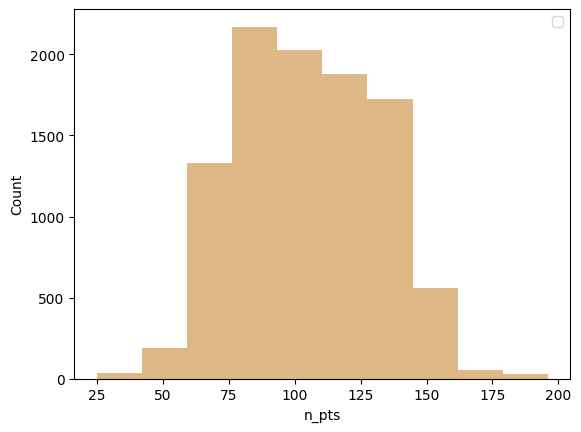

In [ ]:
#lengths = list(length(some_streamlines))
n_pts = [len(streamline) for streamline in some_streamlines]
#print(n_pts)

fig_hist, ax = plt.subplots(1)
ax.hist(n_pts, color='burlywood')
ax.set_xlabel('n_pts')
ax.set_ylabel('Count')
# plt.show()
plt.legend()

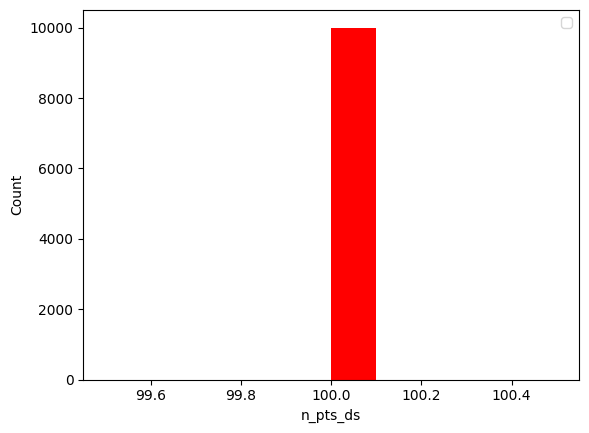

In [ ]:
bundle_interpolate = set_number_of_points(some_streamlines, 100)
n_pts_ds = [len(s) for s in bundle_interpolate]
fig_hist, ax = plt.subplots(1)
ax.hist(n_pts_ds, color='red')
ax.set_xlabel('n_pts_ds')
ax.set_ylabel('Count')
# plt.show()
plt.legend()

In [ ]:
print(len(bundle_interpolate[1]), len(some_streamlines[1]))

100 121


# Guardamos los streamlines

In [ ]:

outputfile=base_path+'/Cursos/2024/Curso AID/Clases AID 2024/Data/tractography/sample_10000.tck'

some_tractogram = StatefulTractogram(bundle_interpolate, filereference, Space.RASMM)
save_tck(some_tractogram, outputfile,bbox_valid_check=False)

#print(bundle_interpolate
#print(some_tractogram)
#print(all)
#print(Space.VOX)

In [ ]:
print(bundle_interpolate)

ArraySequence([array([[ -93.71438 , -140.38773 ,   61.65749 ],
       [ -93.77069 , -140.16379 ,   60.84949 ],
       [ -93.829315, -139.9372  ,   60.04239 ],
       [ -93.895935, -139.70125 ,   59.2386  ],
       [ -93.96834 , -139.45117 ,   58.43975 ],
       [ -94.04941 , -139.18286 ,   57.647556],
       [ -94.14093 , -138.90836 ,   56.858658],
       [ -94.25466 , -138.64957 ,   56.067272],
       [ -94.37845 , -138.42238 ,   55.267784],
       [ -94.521805, -138.21103 ,   54.46728 ],
       [ -94.71901 , -138.00677 ,   53.67746 ],
       [ -94.99837 , -137.81325 ,   52.91128 ],
       [ -95.363525, -137.63457 ,   52.17669 ],
       [ -95.787445, -137.46075 ,   51.47237 ],
       [ -96.2416  , -137.24507 ,   50.799004],
       [ -96.71613 , -136.97867 ,   50.15912 ],
       [ -97.212006, -136.67596 ,   49.55265 ],
       [ -97.71667 , -136.33205 ,   48.976315],
       [ -98.22437 , -135.94484 ,   48.4308  ],
       [ -98.73575 , -135.51785 ,   47.91914 ],
       [ -99.243484, -135